<a href="https://colab.research.google.com/github/mafaldasalomao/03_CNN_With_TF/blob/main/03_intro_cv_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# intro do CNN and CV with TF
#get data
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-07 13:15:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   302MB/s    in 0.3s    

2022-10-07 13:15:10 (302 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os
# walk through pizza-steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct  7 13:15 .
drwxr-xr-x 1 root root 4096 Oct  7 13:15 ..
drwxr-xr-x 4 root root 4096 Oct  7 13:15 test
drwxr-xr-x 4 root root 4096 Oct  7 13:15 train


In [8]:
#Another way to find out how many imges are in file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [9]:
#visualize our images and get class programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created the list class names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
#Visualize our images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directry (We'll view images fromhere)
  target_folder = target_dir+target_class
  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+ "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

['637374.jpg']
Image shape: (512, 512, 3)


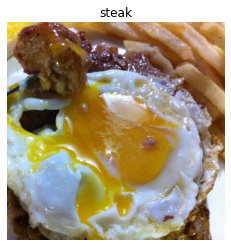

In [11]:
#view random image from the training dataset
img = view_random_image(target_class="steak",
                        target_dir= "pizza_steak/train/")

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[246, 219,  78],
        [243, 216,  75],
        [245, 219,  74],
        ...,
        [232, 206, 209],
        [226, 201, 207],
        [222, 199, 209]],

       [[249, 221,  85],
        [252, 225,  86],
        [251, 224,  83],
        ...,
        [238, 212, 213],
        [235, 210, 214],
        [232, 209, 217]],

       [[249, 222,  91],
        [255, 229,  96],
        [254, 228,  92],
        ...,
        [241, 216, 212],
        [237, 212, 215],
        [233, 211, 214]],

       ...,

       [[119,  96, 114],
        [111,  90, 107],
        [110,  89, 106],
        ...,
        [240, 243, 248],
        [240, 243, 248],
        [243, 246, 251]],

       [[107,  84, 104],
        [107,  86, 105],
        [106,  85, 102],
        ...,
        [240, 243, 248],
        [242, 245, 250],
        [247, 250, 255]],

       [[103,  79, 101],
        [110,  89, 108],
        [107,  86, 105],
        ...,
        [235, 238, 24

In [13]:
#View the shape
img.shape # W H and colour channels


(512, 512, 3)

In [14]:
# Get all the pixel values beteween 0 - 1
img/255.

array([[[0.96470588, 0.85882353, 0.30588235],
        [0.95294118, 0.84705882, 0.29411765],
        [0.96078431, 0.85882353, 0.29019608],
        ...,
        [0.90980392, 0.80784314, 0.81960784],
        [0.88627451, 0.78823529, 0.81176471],
        [0.87058824, 0.78039216, 0.81960784]],

       [[0.97647059, 0.86666667, 0.33333333],
        [0.98823529, 0.88235294, 0.3372549 ],
        [0.98431373, 0.87843137, 0.3254902 ],
        ...,
        [0.93333333, 0.83137255, 0.83529412],
        [0.92156863, 0.82352941, 0.83921569],
        [0.90980392, 0.81960784, 0.85098039]],

       [[0.97647059, 0.87058824, 0.35686275],
        [1.        , 0.89803922, 0.37647059],
        [0.99607843, 0.89411765, 0.36078431],
        ...,
        [0.94509804, 0.84705882, 0.83137255],
        [0.92941176, 0.83137255, 0.84313725],
        [0.91372549, 0.82745098, 0.83921569]],

       ...,

       [[0.46666667, 0.37647059, 0.44705882],
        [0.43529412, 0.35294118, 0.41960784],
        [0.43137255, 0

In [15]:
## An end-to-end example
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set seed
tf.random.set_seed(42)

#preprocess data (get all of the pixel values between 0 & 1, scaling /normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
#setup path to our data directory
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'
#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
#BUild a CNN model ( some as Tiny VGG on the CNN exlpainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    #tf.keras.layers.Activations(tf.nn.relu),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile our model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
1500/32
#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 204ms/step - loss: 0.5984 - accuracy: 0.6660 - val_loss: 0.4208 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4316 - accuracy: 0.8093 - val_loss: 0.3369 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3972 - accuracy: 0.8307 - val_loss: 0.3445 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3454 - accuracy: 0.8480 - val_loss: 0.3065 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3162 - accuracy: 0.8760 - val_loss: 0.2781 - val_accuracy: 0.8800


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [19]:
#evaluate the model
#model_1.evaluate()

In [ ]:
from tensorflow.python import metrics
#set random seed
tf.random.set_seed(42)

#create a model to replicate the tensor playground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

In [ ]:
#get summary model_2
model_2.summary()

In [20]:
#set random seed
tf.random.set_seed(42)

#create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
#compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
history_3=model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 3.4978 - accuracy: 0.6140 - val_loss: 1.3275 - val_accuracy: 0.5420
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.8346 - accuracy: 0.7007 - val_loss: 0.4579 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5902 - accuracy: 0.7567 - val_loss: 0.4749 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5034 - accuracy: 0.7767 - val_loss: 0.5966 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6198 - accuracy: 0.7473 - val_loss: 0.5548 - val_accuracy: 0.7660


In [21]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


['3142618.jpg']
Image shape: (512, 512, 3)
['2412237.jpg']
Image shape: (384, 512, 3)


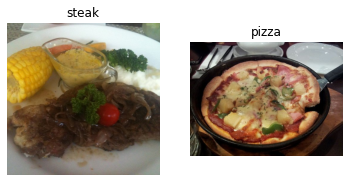

In [22]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
#define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

In [25]:
#turn data into batches:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dategen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# load in our image data from directories and tirn them into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory= test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [30]:
len(train_data)#1500/32

47

In [32]:
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.95294124, 0.9450981 , 0.9490197 ],
          [0.8235295 , 0.81568635, 0.8196079 ],
          [0.97647065, 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [36]:
 #create a CNN model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [37]:
model_4 = Sequential([
     Conv2D(filters=10,
            kernel_size=3,
            activation="relu",
            strides=1,
            padding="valid",
            input_shape=(224,224, 3)), #input layers specify input_shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") #output layer
 ])

In [41]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [43]:
#fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 214ms/step - loss: 0.0335 - accuracy: 0.9927 - val_loss: 0.6571 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.0144 - accuracy: 0.9980 - val_loss: 0.7260 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.7343 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7808 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 7.9535e-04 - accuracy: 1.0000 - val_loss: 0.8570 - val_accuracy: 0.7980


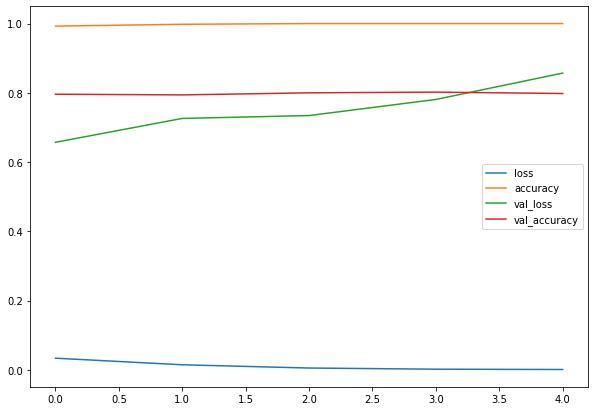

In [49]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [50]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

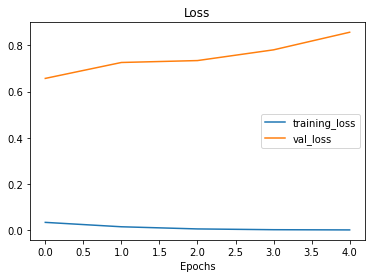

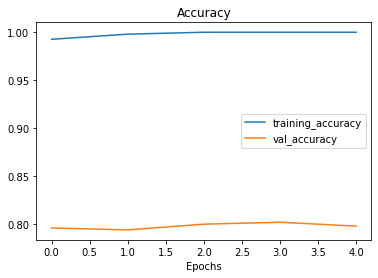

In [51]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [52]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [54]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [55]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 0.6151 - accuracy: 0.6513 - val_loss: 0.5348 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4845 - accuracy: 0.7760 - val_loss: 0.3742 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4287 - accuracy: 0.8240 - val_loss: 0.3775 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4026 - accuracy: 0.8207 - val_loss: 0.3560 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3731 - accuracy: 0.8400 - val_loss: 0.4288 - val_accuracy: 0.7980


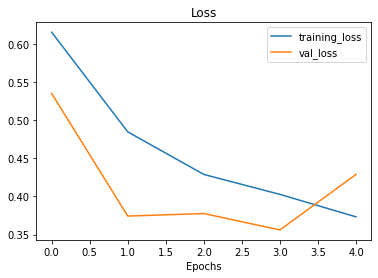

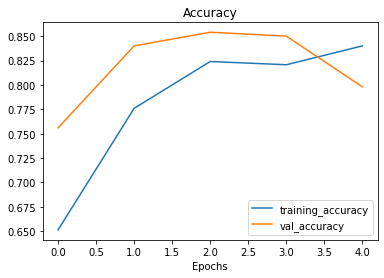

In [56]:
# Check out the loss curves of model_4
plot_loss_curves(history_5)

In [57]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [58]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [59]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same


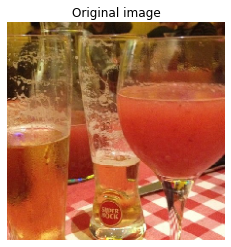

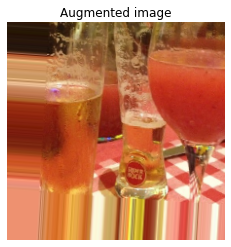

In [60]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


In [61]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 482ms/step - loss: 0.7013 - accuracy: 0.4113 - val_loss: 0.6879 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6993 - accuracy: 0.5853 - val_loss: 0.6747 - val_accuracy: 0.6140
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6909 - accuracy: 0.5380 - val_loss: 0.6611 - val_accuracy: 0.6800
Epoch 4/5
47/47 [==============================] - 23s 494ms/step - loss: 0.6660 - accuracy: 0.6427 - val_loss: 0.6161 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6666 - accuracy: 0.6053 - val_loss: 0.5827 - val_accuracy: 0.7260


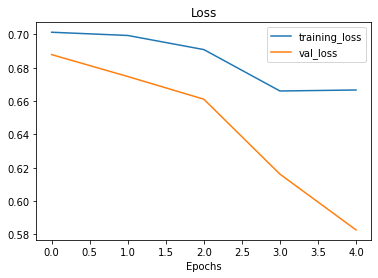

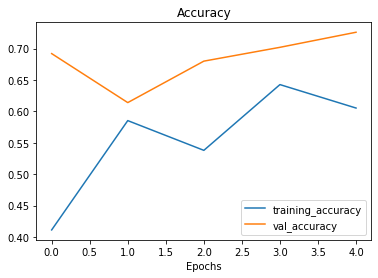

In [62]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [63]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [64]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6301 - accuracy: 0.6433 - val_loss: 0.5185 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 23s 488ms/step - loss: 0.5051 - accuracy: 0.7573 - val_loss: 0.3578 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 25s 526ms/step - loss: 0.4753 - accuracy: 0.7827 - val_loss: 0.3522 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 23s 477ms/step - loss: 0.4639 - accuracy: 0.7927 - val_loss: 0.7022 - val_accuracy: 0.6440
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.4967 - accuracy: 0.7573 - val_loss: 0.4794 - val_accuracy: 0.7740


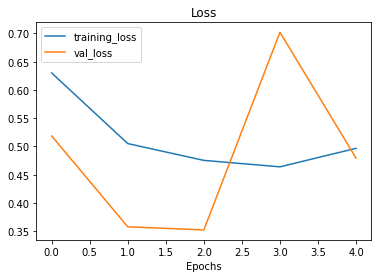

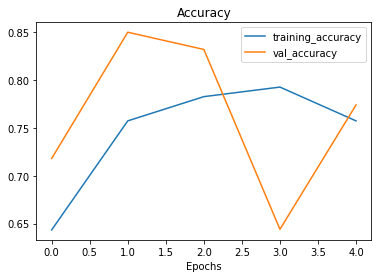

In [65]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [66]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6174 - accuracy: 0.6513 - val_loss: 0.4345 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5049 - accuracy: 0.7700 - val_loss: 0.4382 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.4888 - accuracy: 0.7780 - val_loss: 0.3845 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5034 - accuracy: 0.7547 - val_loss: 0.3499 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4769 - accuracy: 0.7760 - val_loss: 0.3318 - val_accuracy: 0.8580


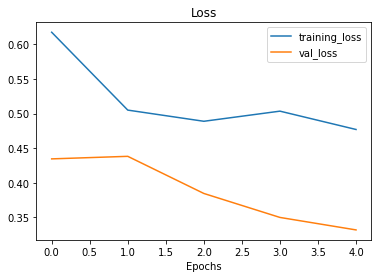

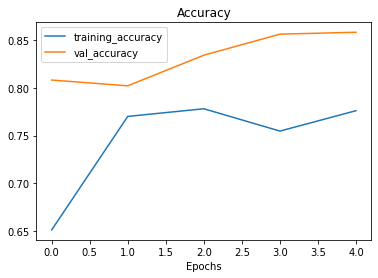

In [67]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

In [68]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-10-07 15:34:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2022-10-07 15:34:15 (40.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



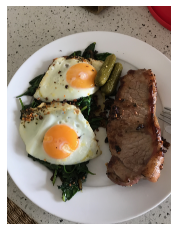

In [69]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [70]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [71]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [72]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [73]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: ignored

In [74]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [75]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

array([[0.8813152]], dtype=float32)

In [76]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [77]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

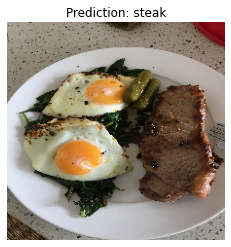

In [78]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-10-07 15:35:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2022-10-07 15:35:23 (62.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



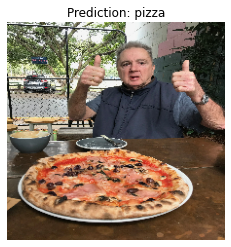

In [79]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)